In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",100)

In [2]:
df=pd.read_csv('LoansTrainingSet.csv')

In [3]:
df.sample(5)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
56266,37fcd13b-c225-4577-ab75-1ed21e555896,c95e4a3c-5f3f-4586-b153-09515c752400,Fully Paid,8151,Short Term,727.0,3 years,Home Mortgage,46869.0,Debt Consolidation,$621.02,10.0,NaN,15,0,8170,33482,0.0,0.0
233104,e7f62010-eb63-4091-a9cb-12426fa2e58f,c158e0ee-1ab3-4f72-804f-a1c20b5a3092,Charged Off,6982,Short Term,NaN,4 years,Rent,NaN,Debt Consolidation,$530.79,9.4,NaN,5,0,20308,21445,0.0,0.0
222182,dd19da76-e445-4b72-b0bd-738bb6e41c85,289ec10a-8011-4a72-b015-5c3af29460c1,Fully Paid,5876,Short Term,NaN,< 1 year,Rent,NaN,Debt Consolidation,$650.67,8.5,NaN,13,0,6800,39082,0.0,0.0
205510,cc91e597-0b12-48f8-8574-293a690058f6,501ba0be-a21d-4039-989d-83426e0888ef,Charged Off,6086,Short Term,718.0,5 years,Rent,55792.0,Debt Consolidation,$729.94,23.3,NaN,22,0,20869,115300,0.0,0.0
137853,8935c912-31c6-4d4d-abac-85cd244c697e,729d784f-f10d-484a-aee6-ac12ce0d7fe3,Fully Paid,3065,Short Term,666.0,10+ years,Own Home,35756.0,Debt Consolidation,$306.91,14.4,36.0,14,1,3467,31237,1.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       256984 non-null  object 
 1   Customer ID                   256984 non-null  object 
 2   Loan Status                   256984 non-null  object 
 3   Current Loan Amount           256984 non-null  int64  
 4   Term                          256984 non-null  object 
 5   Credit Score                  195308 non-null  float64
 6   Years in current job          245508 non-null  object 
 7   Home Ownership                256984 non-null  object 
 8   Annual Income                 195308 non-null  float64
 9   Purpose                       256984 non-null  object 
 10  Monthly Debt                  256984 non-null  object 
 11  Years of Credit History       256984 non-null  float64
 12  Months since last delinquent  116601 non-nul

In [5]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,2.569840e+05,195308.000000,1.953080e+05,256984.000000,116601.000000,256984.000000,256984.000000,2.569840e+05,256455.000000,256961.000000
mean,1.371331e+07,1251.116099,7.195272e+04,18.290195,34.881450,11.106267,0.156628,1.540656e+04,0.110316,0.027203
std,3.438131e+07,1762.016848,5.887757e+04,7.075747,21.854165,4.982982,0.460731,1.966506e+04,0.336229,0.245950
min,5.050000e+02,585.000000,0.000000e+00,3.400000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.299000e+03,714.000000,4.432100e+04,13.500000,16.000000,8.000000,0.000000,5.974000e+03,0.000000,0.000000
50%,1.429800e+04,733.000000,6.124200e+04,17.000000,32.000000,10.000000,0.000000,1.107800e+04,0.000000,0.000000
75%,2.436700e+04,744.000000,8.646200e+04,21.700000,51.000000,14.000000,0.000000,1.931900e+04,0.000000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,11.000000,1.731412e+06,7.000000,11.000000


<AxesSubplot:>

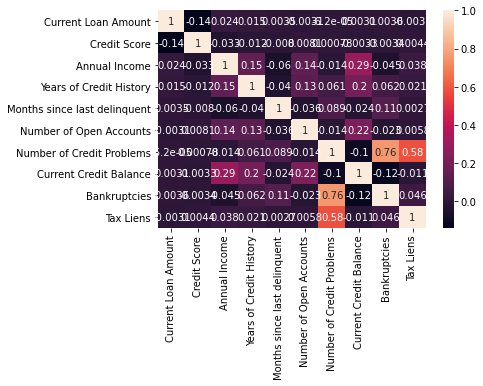

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
df.corr()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.139743,0.024069,0.014725,0.003488,-0.003094,-0.000062,0.003138,0.003576,-0.003069
Credit Score,-0.139743,1.000000,-0.033221,-0.011658,-0.007994,0.008124,0.000777,-0.003263,-0.003426,0.004381
Annual Income,0.024069,-0.033221,1.000000,0.146859,-0.059675,0.140463,-0.013672,0.292165,-0.044837,0.038185
Years of Credit History,0.014725,-0.011658,0.146859,1.000000,-0.039695,0.128033,0.061251,0.201001,0.062049,0.020915
Months since last delinquent,0.003488,-0.007994,-0.059675,-0.039695,1.000000,-0.035803,0.088612,-0.024292,0.112907,0.002730
Number of Open Accounts,-0.003094,0.008124,0.140463,0.128033,-0.035803,1.000000,-0.013731,0.222763,-0.022805,0.005754
Number of Credit Problems,-0.000062,0.000777,-0.013672,0.061251,0.088612,-0.013731,1.000000,-0.103814,0.755866,0.584917
Current Credit Balance,0.003138,-0.003263,0.292165,0.201001,-0.024292,0.222763,-0.103814,1.000000,-0.117995,-0.011118
Bankruptcies,0.003576,-0.003426,-0.044837,0.062049,0.112907,-0.022805,0.755866,-0.117995,1.000000,0.046160
Tax Liens,-0.003069,0.004381,0.038185,0.020915,0.002730,0.005754,0.584917,-0.011118,0.046160,1.000000


In [8]:
# Credit Score ortalama değer ile dolduruldu
df['Credit Score'].fillna(df['Credit Score'].mean(),inplace=True)

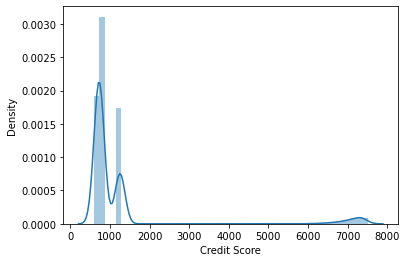

In [9]:
sns.distplot(df['Credit Score']);

<AxesSubplot:xlabel='Credit Score', ylabel='Density'>

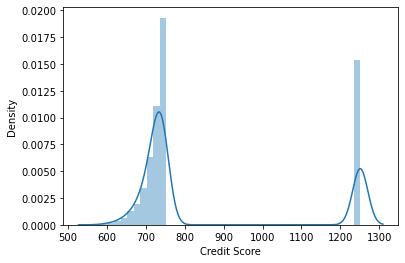

In [10]:
df=df[df['Credit Score']<2000]
sns.distplot(df['Credit Score'])

In [11]:
#Annual Income ortalama değer ile dolduruldu
df['Annual Income'].fillna(df['Annual Income'].mean(),inplace=True)

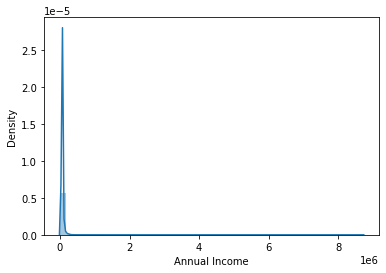

In [12]:
sns.distplot(df['Annual Income']);

In [13]:
#Months since last delinquent değerlerinde boş yerler 0 değeri ile dolduruldu
df['Months since last delinquent'].fillna("0",inplace=True)
#Months since last delinquent değerleri tam sayı olacağından float dan int değerlere dönüştürüldü
df['Months since last delinquent']=df['Months since last delinquent'].astype(int)

<AxesSubplot:xlabel='Months since last delinquent', ylabel='Count'>

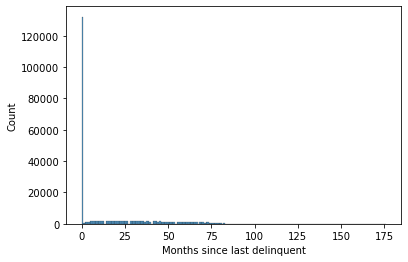

In [14]:
sns.histplot(df['Months since last delinquent'])

<AxesSubplot:xlabel='Months since last delinquent', ylabel='Count'>

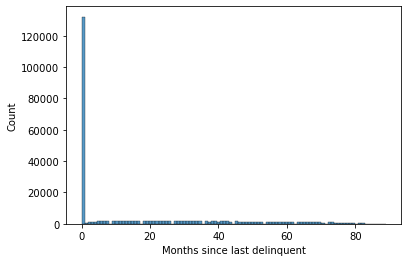

In [15]:
df=df[df['Months since last delinquent']<90]
sns.histplot(df['Months since last delinquent'])

In [16]:
#Years in current job de bulunan years ve noktalama işaretleri kaldırıldı
df['Years in current job'].replace('[^0-9]',"",inplace=True,regex=True)
#ve null olan alanlara 0 değeri atandı
df['Years in current job'].fillna('0',inplace=True)
#Years in current job int değerine çevrildi
df['Years in current job']=df['Years in current job'].astype(int)
#Daha önce 0 atanan değerlere ortalama bir değer atanarak gerçeklik sağlandı
#Years in current job int değerine çevrildi
df['Years in current job']=df['Years in current job'].astype(int)
#Daha önce 0 atanan değerlere ortalama bir değer atanarak gerçeklik sağlandı
df['Years in current job'].replace('0',df['Years in current job'].mean(),inplace=True)

<AxesSubplot:xlabel='Years in current job', ylabel='Count'>

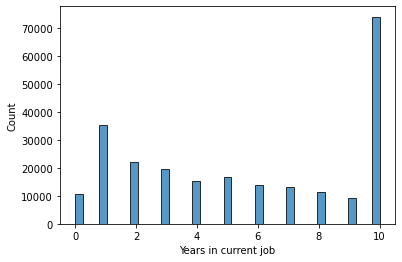

In [17]:
sns.histplot(df['Years in current job'])

In [18]:
#Maximum Open Credit object halinde bu değerleri float türüne çevrildi
df['Maximum Open Credit'].replace('[a-zA-Z@_!#$%^&*()<>?/\|}{~:]',"0",inplace=True,regex=True)
df['Maximum Open Credit']=df['Maximum Open Credit'].astype(float)

In [19]:
#sns.histplot(df['Maximum Open Credit'])

In [20]:
#Bankruptcies null olanlar 0 ile değiştirildi
df['Bankruptcies'].fillna("0",inplace=True)
#Bankruptcies object türünden int türüne çevrildi
df['Bankruptcies']=df['Bankruptcies'].astype(int)

<AxesSubplot:xlabel='Bankruptcies', ylabel='Count'>

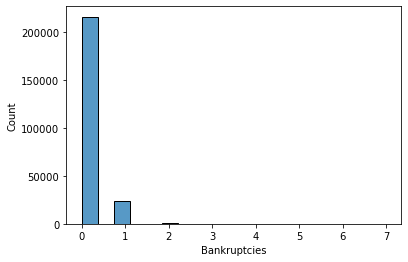

In [21]:
sns.histplot(df['Bankruptcies'])

<AxesSubplot:xlabel='Bankruptcies', ylabel='Count'>

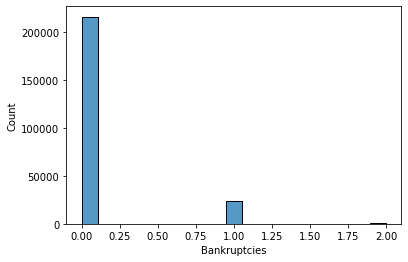

In [22]:
df=df[df['Bankruptcies']<3]
sns.histplot(df['Bankruptcies'])

In [23]:
#Tax Liens null olanlar 0 ile değiştirildi
df['Tax Liens'].fillna("0",inplace=True)
#Tax Liens daha sora object türünden int türüne dönüştürüldü
df['Tax Liens']=df['Tax Liens'].astype(int)

<AxesSubplot:xlabel='Tax Liens', ylabel='Count'>

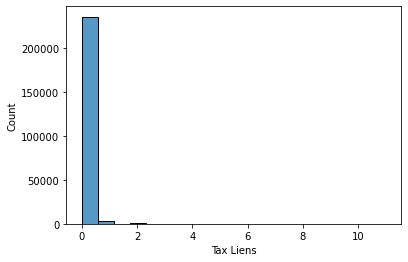

In [24]:
sns.histplot(df['Tax Liens'])

<AxesSubplot:xlabel='Tax Liens', ylabel='Count'>

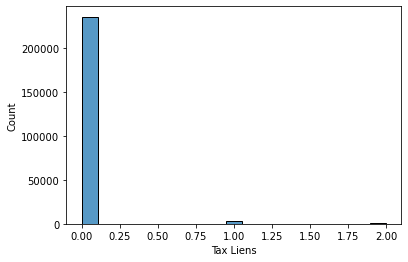

In [25]:
df=df[df['Tax Liens']<3]
sns.histplot(df['Tax Liens'])

In [26]:
#Monthly Debt object türünden fazla olan semboller kaldırılarak float türüne çevrildi
df['Monthly Debt'].replace('[^0-9.]','',inplace=True,regex=True)
df['Monthly Debt']=df['Monthly Debt'].astype(float)

<AxesSubplot:xlabel='Monthly Debt', ylabel='Count'>

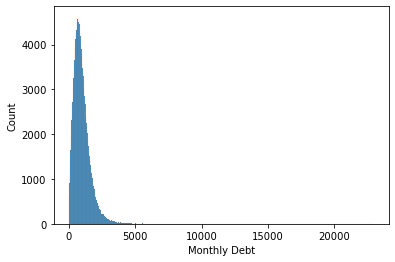

In [27]:
sns.histplot(df['Monthly Debt'])

<AxesSubplot:xlabel='Monthly Debt', ylabel='Count'>

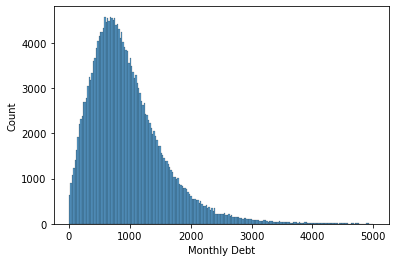

In [28]:
df=df[df['Monthly Debt']<5000]
sns.histplot(df['Monthly Debt'])

In [29]:
df.isnull().sum() #Şuan boş satırımız kalmadı

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [30]:
df.select_dtypes("object_")

,Loan ID,Customer ID,Loan Status,Term,Home Ownership,Purpose
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,Short Term,Home Mortgage,Debt Consolidation
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,Short Term,Home Mortgage,other
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,Short Term,Home Mortgage,Debt Consolidation
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,Short Term,Own Home,Debt Consolidation
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,Short Term,Rent,Debt Consolidation
...,...,...,...,...,...,...
256978,fffe84cf-67a1-468d-ab7b-cf06a9c4ee14,460c6cf5-4d12-4e3c-a3d0-46dd67c78cce,Charged Off,Short Term,Home Mortgage,Debt Consolidation
256979,fffef5b7-be99-4666-ac70-2a397d2ee435,7211a8e3-cba4-4132-b939-222eed8a662c,Fully Paid,Short Term,Rent,Debt Consolidation
256980,ffffca93-aa8c-4123-b8ff-7852f6df889a,616fef0c-8f09-4327-9b5c-48fcfaa52934,Fully Paid,Short Term,Own Home,Debt Consolidation
256982,ffffcb2e-e48e-4d2c-a0d6-ed6bce5bfdbe,971a6682-183b-4a52-8bce-1d3429ade295,Charged Off,Short Term,Home Mortgage,Debt Consolidation


In [31]:
df['Loan Status'].value_counts()

Fully Paid     175516
Charged Off     64301
Name: Loan Status, dtype: int64

<AxesSubplot:xlabel='Loan Status', ylabel='count'>

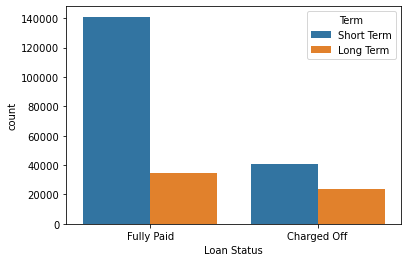

In [32]:
sns.countplot(df['Loan Status'],hue=df['Term'])

In [33]:
df['Term'].value_counts()

Short Term    181522
Long Term      58295
Name: Term, dtype: int64

<AxesSubplot:xlabel='Term', ylabel='count'>

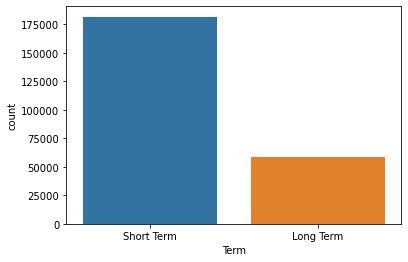

In [34]:
sns.countplot(df['Term'])

In [35]:
df['Home Ownership'].value_counts() 

Home Mortgage    116914
Rent             101032
Own Home          21332
HaveMortgage        539
Name: Home Ownership, dtype: int64

In [36]:
#Home Ownership verilerini düzenlememiz gerekmekte
df['Home Ownership'].replace(['HaveMortgage','Home Mortgage'],'Mortgage',inplace=True)

In [37]:
df['Home Ownership'].value_counts()

Mortgage    117453
Rent        101032
Own Home     21332
Name: Home Ownership, dtype: int64

<AxesSubplot:xlabel='Home Ownership', ylabel='count'>

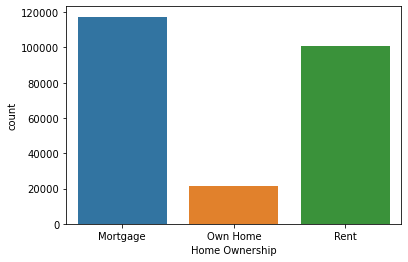

In [38]:
sns.countplot(df['Home Ownership'])

In [39]:
df['Purpose'].value_counts()

Debt Consolidation      190288
Home Improvements        14012
other                    13238
Other                     9104
Business Loan             4241
Buy a Car                 3126
Medical Bills             2654
Take a Trip               1474
Buy House                 1427
Educational Expenses       253
Name: Purpose, dtype: int64

In [40]:
#Purpose alanlarını düzenleyelim
df['Purpose'].replace('other','Other',inplace=True)

In [41]:
df['Purpose'].value_counts()

Debt Consolidation      190288
Other                    22342
Home Improvements        14012
Business Loan             4241
Buy a Car                 3126
Medical Bills             2654
Take a Trip               1474
Buy House                 1427
Educational Expenses       253
Name: Purpose, dtype: int64

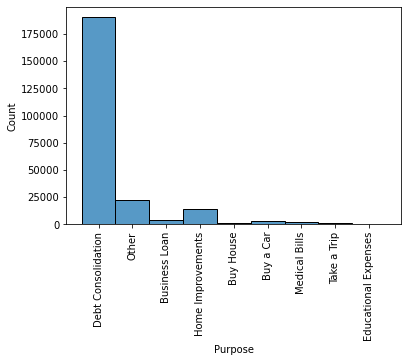

In [42]:
sns.histplot(df['Purpose']);
plt.xticks(rotation=90);

In [43]:
df=df.drop(['Loan ID','Customer ID'],axis=1)

In [44]:
df.sample(5)

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
40178,Charged Off,4763,Short Term,746.000000,1,Mortgage,30081.000000,Buy House,313.34,14.0,0,8,0,6086,20087.0,0,0
128062,Fully Paid,15328,Short Term,741.000000,3,Mortgage,99530.000000,Debt Consolidation,2355.55,23.4,0,13,0,29245,55283.0,0,0
211418,Fully Paid,99999999,Short Term,746.000000,4,Mortgage,129876.000000,Business Loan,1742.51,23.5,0,13,0,39056,68160.0,0,0
212678,Fully Paid,13298,Short Term,1251.116099,10,Mortgage,72535.550103,Debt Consolidation,915.50,39.9,45,16,0,14159,77371.0,0,0
148143,Fully Paid,10056,Short Term,737.000000,8,Mortgage,150840.000000,Debt Consolidation,3695.58,17.9,66,11,0,28772,32584.0,0,0


In [45]:
x,y=df.drop('Loan Status',axis=1),df[['Loan Status']]

In [46]:
x=pd.get_dummies(x,drop_first=True)

In [47]:
y=pd.get_dummies(y,drop_first=True)

In [48]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239817 entries, 0 to 256983
Data columns (total 24 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Current Loan Amount           239817 non-null  int64  
 1   Credit Score                  239817 non-null  float64
 2   Years in current job          239817 non-null  int32  
 3   Annual Income                 239817 non-null  float64
 4   Monthly Debt                  239817 non-null  float64
 5   Years of Credit History       239817 non-null  float64
 6   Months since last delinquent  239817 non-null  int32  
 7   Number of Open Accounts       239817 non-null  int64  
 8   Number of Credit Problems     239817 non-null  int64  
 9   Current Credit Balance        239817 non-null  int64  
 10  Maximum Open Credit           239817 non-null  float64
 11  Bankruptcies                  239817 non-null  int32  
 12  Tax Liens                     239817 non-nul

In [49]:
y.shape,x.shape

((239817, 1), (239817, 24))

In [50]:
def classification_funct(x,y):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.naive_bayes import BernoulliNB
    from sklearn.svm import SVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.linear_model import LogisticRegression
    from xgboost import XGBClassifier #yüklemek için !pip install xgboost kullandım
    
    from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
    from sklearn.metrics import confusion_matrix,classification_report
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)
    
    print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
    
    g=GaussianNB()
    b=BernoulliNB()
    SVC=SVC()
    KN=KNeighborsClassifier()
    D=DecisionTreeClassifier()
    R=RandomForestClassifier()
    Log=LogisticRegression()
    XGBC=XGBClassifier()
    
    algos=[g,b,SVC,KN,D,R,Log,XGBC]
    algo_names=['GaussianNB','BernoulliNB','SVC','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','LogisticRegression','XGBClassifier']
    
    accuracy_scored=[]
    precision_scored=[]
    recall_scored=[]
    f1_scored=[]
    
    for item in algos:
        item.fit(x_train,y_train)
        accuracy_scored.append(accuracy_score(y_test,item.predict(x_test)))
        precision_scored.append(precision_score(y_test,item.predict(x_test)))
        recall_scored.append(recall_score(y_test,item.predict(x_test)))
        f1_scored.append(f1_score(y_test,item.predict(x_test)))
        
    result=pd.DataFrame(columns=['f1_score','recall_score','precision_score','accuracy_score'],index=algo_names)
    result.f1_score=f1_scored
    result.recall_score=recall_scored
    result.precision_score=precision_scored
    result.accuracy_score=accuracy_scored
    classification_funct.result=result.sort_values('f1_score',ascending=False)
    return result.sort_values('f1_score',ascending=False)  
    

In [51]:
classification_funct(x,y)

(191853, 24) (47964, 24) (191853, 1) (47964, 1)
[03:56:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,f1_score,recall_score,precision_score,accuracy_score
RandomForestClassifier,0.892766,0.950857,0.841364,0.832249
XGBClassifier,0.846985,0.926925,0.779739,0.754045
SVC,0.846853,1.000000,0.734384,0.734384
LogisticRegression,0.846749,0.999744,0.734365,0.734238
BernoulliNB,0.846693,0.997360,0.735574,0.734759
DecisionTreeClassifier,0.819477,0.793607,0.847091,0.743224
KNeighborsClassifier,0.808881,0.846610,0.774370,0.706196
GaussianNB,0.342970,0.207132,0.996449,0.417188


<AxesSubplot:>

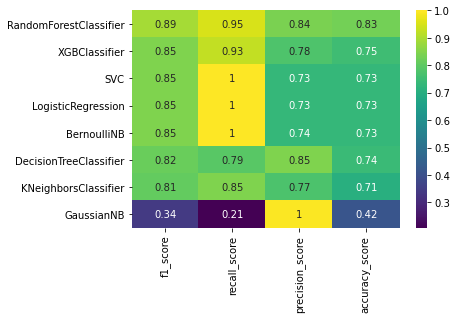

In [52]:
sns.heatmap(classification_funct.result,cmap='viridis',annot=True)